Лабораторная работа № 2 по Нейроинформатике

Линейная нейронная сеть. Правило обучения Уидроу-Хоффа

Выполнила: Тимофеева Наталья М8О-408Б-19

Вариант № 16

Часть 1

Аппроксимация

In [81]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from matplotlib import pyplot as plt
from timeit import default_timer as timer

Задаём сигнал

In [82]:
def signal(t):
    return np.sin(-np.sin(t) * t * t + t)

Создание модели

In [83]:
epochs = 15
discrete = 5
t = np.arange(0.5, 4, 0.01)
y = signal(t).tolist()


In [84]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim = discrete, activation='linear',
                             kernel_initializer = keras.initializers.RandomNormal(stddev = 0.5, mean = 0.0),
                             bias_initializer = keras.initializers.RandomNormal(stddev = 0.5, mean = 0.0)))

In [85]:
optimazer = keras.optimizers.SGD(learning_rate = 0.01)
model.compile(loss = 'mse', optimizer = optimazer, metrics = ['mae'])

Подготовка данных

In [86]:
windows = [y[i:i + discrete] for i in range(0, len(y) - discrete)]
expectations = [y[i] for i in range(discrete, len(y))]
# Проверка соответствия размеров
assert len(windows) == len(expectations)

Обучение модели

In [87]:
time_start = timer()
hist = model.fit(windows, expectations, batch_size = 1, epochs = epochs, shuffle = True)
time_end = timer()

Epoch 1/15
345/345 [==============================] - 0s 634us/step - loss: 0.0439 - mae: 0.1408
Epoch 2/15
345/345 [==============================] - 0s 656us/step - loss: 0.0242 - mae: 0.1012
Epoch 3/15
345/345 [==============================] - 0s 669us/step - loss: 0.0156 - mae: 0.0808
Epoch 4/15
345/345 [==============================] - 0s 689us/step - loss: 0.0101 - mae: 0.0654
Epoch 5/15
345/345 [==============================] - 0s 641us/step - loss: 0.0066 - mae: 0.0534
Epoch 6/15
345/345 [==============================] - 0s 755us/step - loss: 0.0043 - mae: 0.0432
Epoch 7/15
345/345 [==============================] - 0s 660us/step - loss: 0.0028 - mae: 0.0359
Epoch 8/15
345/345 [==============================] - 0s 672us/step - loss: 0.0019 - mae: 0.0299
Epoch 9/15
345/345 [==============================] - 0s 686us/step - loss: 0.0013 - mae: 0.0250
Epoch 10/15
345/345 [==============================] - 0s 632us/step - loss: 8.9070e-04 - mae: 0.0215
Epoch 11/15
345/345 [====

In [88]:
print('Эпох: {0}'.format(epochs))
print('Время обучения: {0} секунд'.format(int(time_end - time_start)))
print('Функция потерь MSE: {0}'.format(min(hist.history['loss'])))
print('Метрика качества MAE: {0}'.format(min(hist.history['mae'])))

Эпох: 15
Время обучения: 3 секунд
Функция потерь MSE: 0.0002707249077502638
Метрика качества MAE: 0.012732269242405891


Предсказание

In [89]:
y_predicted = y[:discrete]
errors = []
for i in range(0, len(expectations)):
    predicted = model.predict([windows[i]])
    y_predicted += [predicted]
    errors += [predicted.item() - expectations[i]]

1/1 [==============================] - 0s 41ms/step


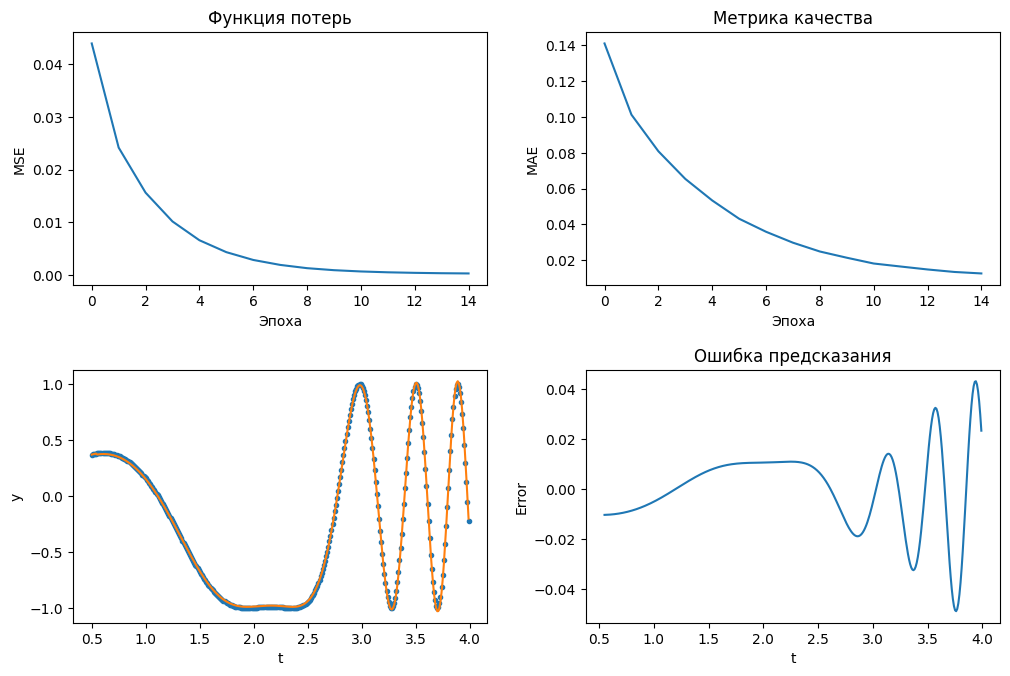

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6.5))
fig.tight_layout(h_pad = 4, w_pad = 4)

axes[0, 0].set_title('Функция потерь')
axes[0, 0].set_xlabel('Эпоха')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].plot(hist.history['loss'])

axes[0, 1].set_title('Метрика качества')
axes[0, 1].set_xlabel('Эпоха')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].plot(hist.history['mae'])

axes[1, 0].set_xlabel('t')
axes[1, 0].set_ylabel('y')
axes[1, 0].plot(t, y, '.')
axes[1, 0].plot(t, y_predicted)

axes[1, 1].set_title('Ошибка предсказания')
axes[1, 1].set_xlabel('t')
axes[1, 1].set_ylabel('Error')
axes[1, 1].plot(t[discrete:], errors)